<h3>Setting up our environment</h3>

In [1]:
import pandas as pd
import numpy as np
from easyutils import Dataframe_Inspector,Data_Preprocessor,Data_Decomposer

from tensorflow import keras
from sklearn.model_selection import train_test_split

<h4>These are our three classes, which are Dataframe_Inspector , Data_Preprocessor , Data_Decomposer</h4>

In [77]:
inspector=Dataframe_Inspector()
preprocessor=Data_Preprocessor()
decomposer=Data_Decomposer()

<h3>Preliminary Examination of the dataset</h3>

In [3]:
df=pd.read_csv("Employee.csv")

<h4>Insepector.inspect(dataframe) allows us to do a simple check of the dataframe for any initial anomalies</h4>

In [4]:
inspector.inspect(df)

NaN Values: 0
Duplicate Rows: 1889
Constant Columns: 0
High Missing Value Columns: 0


<h4>We have found out that some rows are duped in this dataframe, we will clean them now.</h4>

In [5]:
df=df.drop_duplicates()

In [6]:
inspector.inspect(df)

NaN Values: 0
Duplicate Rows: 0
Constant Columns: 0
High Missing Value Columns: 0


<h4>As you can see duplicates are removed now Duplicates are removed now </h4>

In [7]:
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


<h4>inspector.retrieve_labels(dataframe,columns) allows us to extract the label column from our dataframe,
and deleting it from the dataframe at the same time.</h4>

In [8]:
labels=inspector.retrieve_labels(df,"LeaveOrNot")

In [9]:
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,2017,Bangalore,3,34,Male,No,0
1,Bachelors,2013,Pune,1,28,Female,No,3
2,Bachelors,2014,New Delhi,3,38,Female,No,2
3,Masters,2016,Bangalore,3,27,Male,No,5
4,Masters,2017,Pune,3,24,Male,Yes,2


In [10]:
df["JoiningYear"]=2023-df["JoiningYear"] 
df.rename(columns={"JoiningYear":"YearsSinceJoined"},inplace=True)

In [78]:
df.head(5)

,Education,YearsSinceJoined,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,6,Bangalore,3,34,Male,No,0
1,Bachelors,10,Pune,1,28,Female,No,3
2,Bachelors,9,New Delhi,3,38,Female,No,2
3,Masters,7,Bangalore,3,27,Male,No,5
4,Masters,6,Pune,3,24,Male,Yes,2


<h2>Now I will tell you about the best approach to use this module which utilizes sklearn.
 <br> We will retrieve column names and information for each datatype in  our data. 
 <br> Then, We will use the Data_Preprocessor class to work on each category at a time  </h2>



<h3>Now we will retrieve the column names and their info which is categorized by datatypes</h3>

In [12]:
numeric_info,object_info,boolean_info,misc_info=inspector.retrieve_column_info(df)

In [13]:
numeric_cols,object_cols,boolean_cols,misc_cols=inspector.retrieve_column_types(df)

<h3>Now we can work on columns of each type one by one. <br<> We will start With the numeric data </h3>

In [14]:
numeric_cols

['YearsSinceJoined', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']

In [15]:
print(numeric_info)

Numeric Columns:
  Column: YearsSinceJoined
  Datatype: int64
  Min: 5
  Max: 11
  Mean: 7.909551374819102
  Median: 8.0
  Mode: 6

  Column: PaymentTier
  Datatype: int64
  Min: 1
  Max: 3
  Mean: 2.6360347322720696
  Median: 3.0
  Mode: 3

  Column: Age
  Datatype: int64
  Min: 22
  Max: 41
  Mean: 30.952966714905934
  Median: 30.0
  Mode: 28

  Column: ExperienceInCurrentDomain
  Datatype: int64
  Min: 0
  Max: 7
  Mean: 2.644356005788712
  Median: 2.0
  Mode: 2




In [16]:
encoded_numeric_columns=preprocessor.apply_and_save(method="MinMaxScaler",
                                                    data_array=np.array(df[numeric_cols]),
                                                    save_location_pkl="preprocessing_files/minmaxscaler.pkl")

MinMaxScaler dumped to: preprocessing_files/minmaxscaler.pkl



In [17]:
encoded_numeric_columns

array([[0.16666667, 1.        , 0.63157895, 0.        ],
       [0.83333333, 0.        , 0.31578947, 0.42857143],
       [0.66666667, 1.        , 0.84210526, 0.28571429],
       ...,
       [0.83333333, 0.5       , 0.78947368, 0.28571429],
       [0.        , 1.        , 0.26315789, 0.71428571],
       [1.        , 1.        , 0.42105263, 0.28571429]])

In [18]:
encoded_numeric_columns.shape

(2764, 4)

<h3>WE move on our object-type categorical Data </h3>

In [19]:
object_cols

['Education', 'City']

In [20]:
print(object_info)

Object Columns:
  Column: Education
  Datatype: object
  Unique Values: ['Bachelors' 'Masters' 'PHD']

  Column: City
  Datatype: object
  Unique Values: ['Bangalore' 'Pune' 'New Delhi']




In [21]:
encoded_object_columns=preprocessor.apply_and_save(method="OneHotEncoder",
                                                    data_array=np.array(df[object_cols]),
                                                    save_location_pkl="preprocessing_files/onehotencoder.pkl")

OneHotEncoder Categories: 
 [array(['Bachelors', 'Masters', 'PHD'], dtype=object), array(['Bangalore', 'New Delhi', 'Pune'], dtype=object)]


OneHotEncoder dumped to: preprocessing_files/onehotencoder.pkl



In [22]:
encoded_object_columns

array([[1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0.]])

In [23]:
encoded_object_columns.shape

(2764, 6)

<h3>Now we move on to our boolean data </h3>

In [24]:
boolean_cols

['Gender', 'EverBenched']

In [25]:
print(boolean_info)

Boolean Columns:
  Column: Gender
  Datatype: Boolean
  Unique Values: ['Male' 'Female']

  Column: EverBenched
  Datatype: Boolean
  Unique Values: ['No' 'Yes']




In [26]:
encoded_gender=preprocessor.assign_binary(data_array=np.array(df["Gender"]),one_class="Male",zero_class="Female")

In [27]:
encoded_gender

array([1, 0, 0, ..., 1, 1, 1])

In [28]:
encoded_gender.shape

(2764,)

In [29]:
encoded_EverBenched=preprocessor.assign_binary(data_array=np.array(df["EverBenched"]),one_class="Yes",zero_class="No")

In [30]:
encoded_EverBenched

array([0, 0, 0, ..., 0, 0, 1])

In [31]:
encoded_EverBenched.shape

(2764,)

<h3>Now we will combine our encoded data arrays into one </h3>

In [32]:
print(numeric_cols+object_cols+boolean_cols)

['YearsSinceJoined', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'Education', 'City', 'Gender', 'EverBenched']


In [33]:
encoded_combined_data=np.concatenate((encoded_numeric_columns,encoded_object_columns,encoded_gender[:,np.newaxis],encoded_EverBenched[:,np.newaxis]),axis=1)

In [34]:
encoded_combined_data.shape

(2764, 12)

In [35]:
encoded_combined_data[1]

array([0.83333333, 0.        , 0.31578947, 0.42857143, 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        ])

<h3>Performing PCA (Principal Component Analysis) Using Data_Decomposer Class</h3>

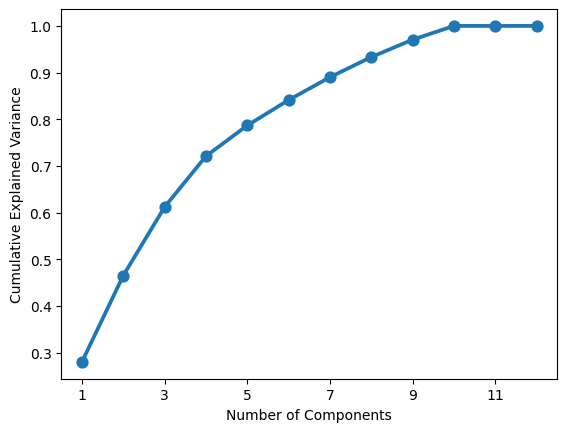

Explained variance with 6 components: 84.12%


In [36]:
decomposer.observe(method="pca",data_array=encoded_combined_data,check=6)

In [37]:
features=decomposer.apply_and_save(method="pca",
                                   num_components=6,
                                   data_array=encoded_combined_data,
                                   save_location_pkl="preprocessing_files/pca.pkl")

PCA object dumped to: preprocessing_files/pca.pkl


In [38]:
features.shape

(2764, 6)

In [39]:
features[1]

array([ 0.03422626,  1.16565024, -0.297874  ,  0.2780413 , -0.18282466,
        0.09169464])

<h3>Now we will just train our model</h3>

In [40]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2)

In [42]:
model=keras.Sequential([
   keras.layers.Input((6,)),
   keras.layers.Dense(16,activation="relu"),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(1,activation="sigmoid")
 ])

2023-11-15 11:49:15.377560: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-15 11:49:15.378057: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [43]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [44]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 0s 1ms/step - loss: 0.7022 - accuracy: 0.5509
Epoch 2/100
70/70 [==============================] - 0s 814us/step - loss: 0.6775 - accuracy: 0.5911
Epoch 3/100
70/70 [==============================] - 0s 704us/step - loss: 0.6701 - accuracy: 0.5934
Epoch 4/100
70/70 [==============================] - 0s 644us/step - loss: 0.6578 - accuracy: 0.6364
Epoch 5/100
70/70 [==============================] - 0s 810us/step - loss: 0.6499 - accuracy: 0.6418
Epoch 6/100
70/70 [==============================] - 0s 782us/step - loss: 0.6393 - accuracy: 0.6630
Epoch 7/100
70/70 [==============================] - 0s 674us/step - loss: 0.6349 - accuracy: 0.6468
Epoch 8/100
70/70 [==============================] - 0s 652us/step - loss: 0.6295 - accuracy: 0.6721
Epoch 9/100
70/70 [==============================] - 0s 631us/step - loss: 0.6253 - accuracy: 0.6757
Epoch 10/100
70/70 [==============================] - 0s 677us/step - loss: 0.6236 - accuracy

In [45]:
model.evaluate(x_test,y_test)

18/18 [==============================] - 0s 634us/step - loss: 0.5391 - accuracy: 0.7577


[0.5391373634338379, 0.7576853632926941]

<h3> Now it is time to see the main benefit of using this approach. When we used apply_and_save  method, our fitted objects were dumped to a location.
Now we just need those objects and we can transform any new data in just a few lines of code</h3>

In [66]:
df.head(1)

,Education,YearsSinceJoined,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,6,Bangalore,3,34,Male,No,0


In [67]:
labels[0]

0

<h3>Now, here I just manually entered the data from the first row. Now, I am just using .load_and_apply to transfomed each array using my saved objects,
combine them and apply my pca object on top of it. This give me the same transformation with new data  in just a a few lines of code</h3>

In [79]:
print(numeric_cols+object_cols+boolean_cols)

['YearsSinceJoined', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'Education', 'City', 'Gender', 'EverBenched']


In [72]:
Numeric_inputs=np.array([[6,3,34,0]]) # Need to be in 2D Shapes
Object_inputs=np.array([["Bachelors","Bangalore"]])
Bool_inputs=np.array([[1,0]]) # Male , No

transformed_data=np.concatenate((preprocessor.load_and_apply("preprocessing_files/minmaxscaler.pkl",Numeric_inputs),
                                                         preprocessor.load_and_apply("preprocessing_files/onehotencoder.pkl",Object_inputs),
                                                         Bool_inputs),axis=1)

transformed__decomposed_data=preprocessor.load_and_apply("preprocessing_files/pca.pkl",transformed_data)


In [74]:
transformed__decomposed_data

array([[-0.76859904, -0.42268747,  0.25775625, -0.08156041, -0.08708524,
        -0.41015272]])

<h3>Now as you can see my prediction is correct. This is useful when created an inference or API for your program </h3>

In [76]:
if model.predict(transformed__decomposed_data)>0.5:
    print("Employee leaves")
else:
    print("Employee Don't leave")

1/1 [==============================] - 0s 16ms/step
Employee Don't leave
